Loaded 2800 trials.
Figure saved to: ../results/figures\fig2_scaling_law.pdf


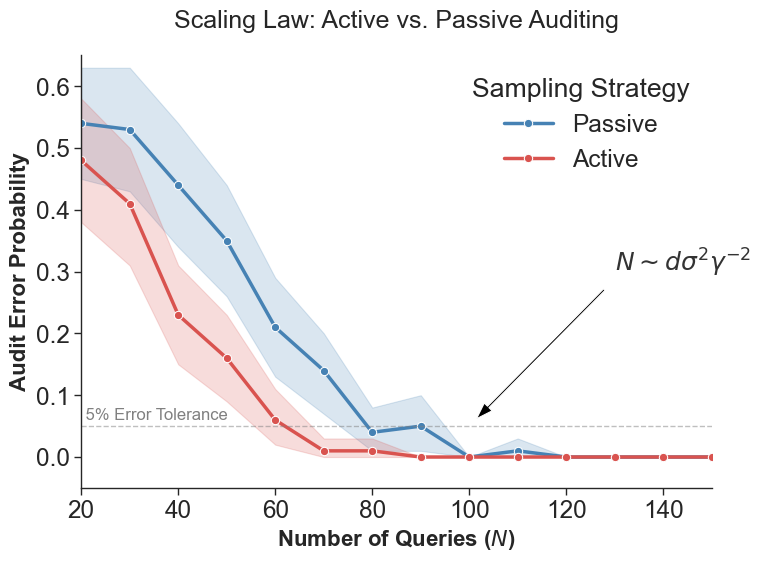

In [2]:
# %% [markdown]
# # Figure 2: The Fundamental Scaling Law of Active Auditing
# 
# This notebook visualizes the sample complexity of **Active Auditing** versus **Passive Sampling**.
# 
# **Theoretical Context:**
# According to Theorem 12, Active Auditing should achieve a sample complexity of:
# $$ N \sim d \sigma^2 \gamma^{-2} \log(1/\delta) $$
# 
# We expect to see the **Active** strategy error rate drop exponentially faster (steep curve) compared to the **Passive** strategy (flat/slow curve).

# %%
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# %% [markdown]
# ## 1. Load Experimental Data

# %%
# Define paths relative to the notebook location
DATA_PATH = "../results/tables/exp1_scaling_law.csv"
FIG_PATH = "../results/figures"

# Ensure output directory exists
os.makedirs(FIG_PATH, exist_ok=True)

# Load data
if not os.path.exists(DATA_PATH):
    raise FileNotFoundError(f"Data file not found at {DATA_PATH}. Please run 'experiments/run_scaling_exp.py' first.")

df = pd.read_csv(DATA_PATH)

print(f"Loaded {len(df)} trials.")
df.head()

# %% [markdown]
# ## 2. Configure Nature-Style Aesthetics
# 
# We use a clean, minimalist style suitable for *Nature Machine Intelligence*.
# - Font: Arial/Helvetica
# - Colors: High contrast (Red for Active, Blue/Grey for Passive)
# - No grid lines (or very faint)

# %%
# Set plotting context
sns.set_context("paper", font_scale=2.0)
sns.set_style("ticks")

# Define Academic Color Palette
# Active = Red (Highlight), Passive = Slate Blue (Baseline)
PALETTE = {"Active": "#D9534F", "Passive": "#4682B4"}

# Configure Matplotlib fonts to look like LaTeX/Arial
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'DejaVu Sans']

# %% [markdown]
# ## 3. Generate the Plot
# 
# We plot **Error Probability (Y-axis)** vs. **Number of Queries (X-axis)**.
# The shaded region represents the 95% Confidence Interval across the Monte Carlo trials.

# %%
plt.figure(figsize=(8, 6))

# Main Line Plot
# ci=95 automatically calculates the confidence interval for the mean
ax = sns.lineplot(
    data=df,
    x="queries",
    y="error",
    hue="method",
    palette=PALETTE,
    linewidth=2.5,
    marker="o",
    markersize=6,
    err_style="band", # Shaded confidence interval
    errorbar=('ci', 95),
)

# --- Aesthetic Customization ---

# 1. Labels
ax.set_xlabel("Number of Queries ($N$)", fontsize=16, fontweight='bold')
ax.set_ylabel("Audit Error Probability", fontsize=16, fontweight='bold')
ax.set_title("Scaling Law: Active vs. Passive Auditing", fontsize=18, pad=20)

# 2. Axes limits
ax.set_ylim(-0.05, 0.65)
ax.set_xlim(min(df["queries"]), max(df["queries"]))

# 3. Legend
# Move legend inside to save space, standard for academic plots
ax.legend(title="Sampling Strategy", frameon=False, loc="upper right")

# 4. Spines (Nature style: despine top and right)
sns.despine()

# 5. Theoretical Annotation (The "Math" Touch)
# We add the scaling law formula pointing to the Active curve
# Find a point on the Active curve to annotate (e.g., near low error)
# (Coordinates are approximate, adjust based on your specific data range)
ax.annotate(r'$N \sim d \sigma^2 \gamma^{-2}$', 
            xy=(100, 0.05), 
            xytext=(130, 0.3),
            arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=8),
            fontsize=18,
            color="#333333")

# 6. Add a threshold line (Optional, e.g., 5% error tolerance)
ax.axhline(0.05, color='gray', linestyle='--', alpha=0.5, linewidth=1)
ax.text(min(df["queries"]), 0.06, " 5% Error Tolerance", color='gray', fontsize=12)

plt.tight_layout()

# %% [markdown]
# ## 4. Save Figure
# 
# Save as PDF for vector quality (required for submission).

# %%
save_path = os.path.join(FIG_PATH, "fig2_scaling_law.pdf")
plt.savefig(save_path, format="pdf", dpi=300, bbox_inches="tight")
print(f"Figure saved to: {save_path}")

# Show plot
plt.show()